In [2]:
%load_ext autoreload
%autoreload 2

In [20]:
import pandas as pd
import seaborn as sns

from data import Data
from brutforce import Brutforce
from visualizer import Visualizer
from average_approximation import AverageApproximation
from gurobi_reduced import GurobiSolverReduced

In [10]:
import matplotlib.pyplot as plt

def evaluate_solver_performance(data):
    bruteforce = Brutforce(data)
    sol_brute = bruteforce.solve()

    bruteforce = AverageApproximation(data)
    sol_average = bruteforce.solve()

    return sol_brute[0] / sol_average[0]

In [25]:
results = {}
repeats = 10
timesteps = [20]
teams = [4, 6, 8, 10]

for repeat in range(repeats):
        for T in timesteps:
            for team in teams:
                print(repeat, T, team)

                data = Data(T=T, num_bells=5, num_teams=team, seed=repeat)

                results[(repeat, T, team)] = evaluate_solver_performance(data)


0 20 4
0 20 6
0 20 8
0 20 10
1 20 4
1 20 6
1 20 8
1 20 10
2 20 4
2 20 6
2 20 8
2 20 10
3 20 4
3 20 6
3 20 8
3 20 10
4 20 4
4 20 6
4 20 8
4 20 10
5 20 4
5 20 6
5 20 8
5 20 10
6 20 4
6 20 6
6 20 8
6 20 10
7 20 4
7 20 6
7 20 8
7 20 10
8 20 4
8 20 6
8 20 8
8 20 10
9 20 4
9 20 6
9 20 8
9 20 10


In [26]:
df = pd.DataFrame(
        [
            [*keys] + [result]
            for keys, result in results.items()
        ],
        columns=["repeat", "T", "teams", "ratio"],
    )

In [27]:
df[:10]

,repeat,T,teams,ratio
0,0,20,4,1.136364
1,0,20,6,1.110000
2,0,20,8,1.112782
3,0,20,10,1.095808
4,1,20,4,1.041096
5,1,20,6,1.027778
6,1,20,8,1.042553
7,1,20,10,1.052023
8,2,20,4,1.171875
9,2,20,6,1.118812


<Axes: xlabel='teams', ylabel='ratio'>

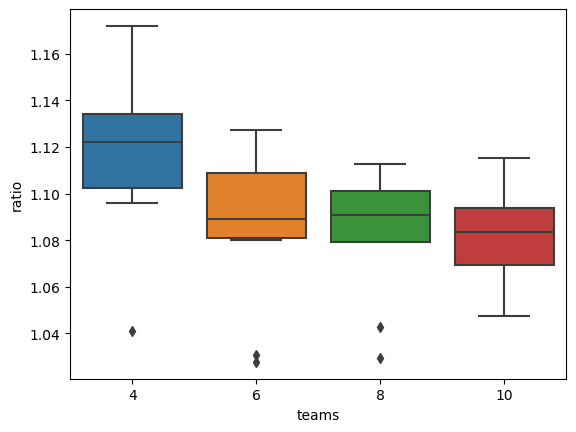

In [29]:
sns.boxplot(df, x="teams", y="ratio")